In [0]:
# hoa_nguyen_1.ipynb

In [0]:
''' scrapes wikipedia for panama and paradise entities and extracts their website link and image, 
stores data in a json file, contains some visualizations''' 

In [0]:
import urllib.request
import json
from PIL import Image
from bs4 import BeautifulSoup as bs
import wikipedia
from google_images_download import google_images_download
import matplotlib.pyplot as plt
import pandas as pd
import string
import numpy as np
from joblib import dump, load

In [0]:
people = dict()
#url = "https://en.wikipedia.org/wiki/List_of_people_and_organisations_named_in_the_Paradise_Papers"
url = "https://en.wikipedia.org/wiki/List_of_people_named_in_the_Panama_Papers"
page = urllib.request.urlopen(url)
soup = bs(page, "lxml")
pplDict = {}
response = google_images_download.googleimagesdownload()
#headlines = soup.find_all("span", class_="mw-headline")
groups = []
key = 'Government_officials' 
names = []
for tag in soup.find_all(True):
    if(tag.name == "li"):
        names.append(tag)
#names = names[17:(len(names) - 243)]
names = names[14:(len(names) - 398)]
count = []
lenNames = len(names)
for tag in soup.find_all(True):
    if(tag.name == 'h3' and tag.span is not None and tag.span.has_attr('id')):
        key = tag.span['id']
    if(key not in pplDict):
        pplDict[key] = {}
    if(tag in names):
        flag = 0
        info_keep = "no url"
        found_image = "no image found"
        name = tag.text
        index = name.find("[")
        rel_name = name
        if(index != -1):
            name = name[:index]
            name = name.strip()
            rel_index = name.find(",")
            if(rel_index != -1):
                rel_name = name[:rel_index]
        rel_index = rel_name.find("[")
        if(rel_index != -1):
            rel_name = rel_name[:rel_index]
        links = tag.find_all("a")
        for link in links:
            if(link.text == rel_name):
                flag = 1
                if('https://' not in link['href']):
                    website = "https://en.wikipedia.org" + link["href"]
                else:
                    website = link["href"]
                try:
                    image_page = urllib.request.urlopen(str(website))
                    image_soup = bs(image_page, "lxml")
                    infobox = image_soup.find("table", class_= "infobox vcard")
                    if(infobox is not None):
                        info_keep = website
                        infobox_image = infobox.find("a", class_= "image")
                        if(infobox_image is not None):
                            infobox_image = infobox_image.find("img")
                            image_link = "https:" + infobox_image['src']
                            found_image = image_link
                except:
                    count = 0
        if(flag == 0 and name != ""):
            print("name", name)
            results = wikipedia.search(rel_name)
            if(len(results) > 0 and (rel_name in results[0] or results[0] in rel_name)):
                if(results[0] != "Daniel Muñoz" and results[0] != "Gordon Parry" and name != "Bashir Ahmed, Pakistani businessman, chairman of Buxly Paints"):
                #if(True):
                    person_page = wikipedia.page(results[0])
                    try:
                        image_page = urllib.request.urlopen(str(person_page.url))
                        image_soup = bs(image_page, "lxml")
                        infobox = image_soup.find("table", class_= "infobox vcard")
                        if(infobox is not None):
                            info_keep = person_page.url
                            infobox_image = infobox.find("a", class_= "image")
                            if(infobox_image is not None):
                                infobox_image = infobox_image.find("img")
                                image_link = "https:" + infobox_image['src']
                                found_image = image_link
                    except:
                        count = 0
        if(found_image == "no image found"):
            arguments = {"keywords":rel_name,"limit":1,"print_urls":True, "no_download": True}
            try:
                paths = response.download(arguments)
                paths_key = list(paths[0].keys())[0]
                if(len(paths[0][paths_key]) > 0):
                    found_image = paths[0][paths_key][0]
            except:
                found_image = "no image found"
        print(name, found_image)
        pplDict[key].update({name:[found_image, str(info_keep)]})
filename = "peopleData1.json"
with open("peopleData1.json", "w+") as f:
    f.write(json.dumps(pplDict))
print("done")

Mauricio Macri, President of Argentina https://upload.wikimedia.org/wikipedia/commons/thumb/0/02/Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg/220px-Presidente_Macri_en_el_Sillon_de_Rivadavia_%28cropped%29.jpg
Salman of Saudi Arabia, King of Saudi Arabia https://upload.wikimedia.org/wikipedia/commons/thumb/c/c1/King_Salman_in_Jeddah_%2848119284576%29_%28cropped%29.jpg/220px-King_Salman_in_Jeddah_%2848119284576%29_%28cropped%29.jpg
Khalifa bin Zayed Al Nahyan, President of the United Arab Emirates and Emir of Abu Dhabi https://upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Sheikh_Khalifa.jpg/220px-Sheikh_Khalifa.jpg
Petro Poroshenko, President of Ukraine https://upload.wikimedia.org/wikipedia/commons/thumb/3/3f/Official_portrait_of_Petro_Poroshenko.jpg/220px-Official_portrait_of_Petro_Poroshenko.jpg
Rafael Correa, former President of Ecuador https://upload.wikimedia.org/wikipedia/commons/thumb/8/83/Rafael_Correa_in_France_%28cropped%29.jpg/220px-Rafael_Correa_in_France


Item no.: 1 --> Item name = Ang Vong Vathana
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.phnompenhpost.com/sites/default/files/styles/full-screen_watermarked/public/field/image/justice_minister_ang_vong_vathana_prisoner_release_03_11_2015_heng_chivoan_0.jpg?itok=KsOGDR52
Printed url without downloading

Errors: 0

Ang Vong Vathana, Minister of Justice https://www.phnompenhpost.com/sites/default/files/styles/full-screen_watermarked/public/field/image/justice_minister_ang_vong_vathana_prisoner_release_03_11_2015_heng_chivoan_0.jpg?itok=KsOGDR52
name Alfredo Ovalle Rodríguez, intelligence agency associate
Alfredo Ovalle Rodríguez, intelligence agency associate no image found

Item no.: 1 --> Item name = Jaynet Kabila
Evaluating...
Getting URLs without downloading images...
Image URL: https://alchetron.com/cdn/jaynet-kabila-fb6e4e11-375e-4986-9b48-5a6c60a8980-resize-750.jpeg
Printed url without downloading

Errors: 0

Jaynet Kabila, Member of the Nation


Item no.: 1 --> Item name = Keith Schembri
Evaluating...
Getting URLs without downloading images...
Image URL: https://pbs.twimg.com/profile_images/992022749374709766/u7iRjjtN_400x400.jpg
Printed url without downloading

Errors: 0

Keith Schembri, Chief of Staff to Prime Minister Joseph Muscat https://pbs.twimg.com/profile_images/992022749374709766/u7iRjjtN_400x400.jpg
name Ken Whitney, legal advisor of Prime Minister of New Zealand, John Key.

Item no.: 1 --> Item name = Ken Whitney
Evaluating...
Getting URLs without downloading images...
Image URL: http://www1.udel.edu/udmessenger/vol25no2/stories/images/whitney.jpg
Printed url without downloading

Errors: 0

Ken Whitney, legal advisor of Prime Minister of New Zealand, John Key. http://www1.udel.edu/udmessenger/vol25no2/stories/images/whitney.jpg
Atiku Abubakar, former Vice President https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Atiku_Abubakar-2010.jpg/220px-Atiku_Abubakar-2010.jpg

Item no.: 1 --> Item name = James Ibor

Antonio Hernández Mancha, retired senator of Senate of Spain and former president of Alianza Popular (nowadays Partido Popular, the political party in the government). no image found
name María del Carmen Luis Heras, former member of Senate of Spain (PP).
María del Carmen Luis Heras, former member of Senate of Spain (PP). no image found
name Antonio García Pagán, former socialist member of Congress of Deputies.
Antonio García Pagán, former socialist member of Congress of Deputies. no image found
name Marta Fernández-Pirla, number two of the Department of Economics at the City Council of Madrid, appointed by the ex-Mayoress, Ana Botella (resigned April 28 after being named).
Marta Fernández-Pirla, number two of the Department of Economics at the City Council of Madrid, appointed by the ex-Mayoress, Ana Botella (resigned April 28 after being named). no image found
name Arturo González Panero, former mayor of Boadilla del Monte. Has been charged in Gürtel case.
Arturo González Panero, for

Anthony Merchant, husband of Senator Pana Merchant https://upload.wikimedia.org/wikipedia/commons/e/e5/Mr._Evatt_Francis_Anthony_Merchant_Jr._Q.C.jpg
name Helene Mathieu; legal consultant, member of the Quebec Bar

Item no.: 1 --> Item name = Helene Mathieu; legal consultant
Evaluating...
Getting URLs without downloading images...
Image URL: http://www.prfire.com/wp-content/uploads/2018/07/HELEN-672x372.png
Printed url without downloading

Errors: 0

Helene Mathieu; legal consultant, member of the Quebec Bar http://www.prfire.com/wp-content/uploads/2018/07/HELEN-672x372.png
name Chen Dongsheng, grandson-in-law of former Chairman Mao Zedong

Item no.: 1 --> Item name = Chen Dongsheng
Evaluating...
Getting URLs without downloading images...
Image URL: https://specials-images.forbesimg.com/imageserve/5dc0b513b4d505000678e48d/416x416.jpg?background=000000&cropX1=1107&cropX2=3472&cropY1=346&cropY2=2710
Printed url without downloading

Errors: 0

Chen Dongsheng, grandson-in-law of former Cha

Getting URLs without downloading images...
Image URL: https://www.xing.com/image/5_4_2_a01e60542_7930164_2/csilla-konti-foto.1024x1024.jpg
Printed url without downloading

Errors: 0

Csilla Konti, wife of László Boldvai, former Hungarian MP https://www.xing.com/image/5_4_2_a01e60542_7930164_2/csilla-konti-foto.1024x1024.jpg

Item no.: 1 --> Item name = Frank Flannery
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.irishtimes.com/polopoly_fs/1.2597737.1459777414!/image/image.jpg_gen/derivatives/box_620_330/image.jpg
Printed url without downloading

Errors: 0

Frank Flannery, political consultant and Fine Gael's former Director of Organisations and Strategy https://www.irishtimes.com/polopoly_fs/1.2597737.1459777414!/image/image.jpg_gen/derivatives/box_620_330/image.jpg
name Yitzhak Abuhatzeira, son of Rabbi David Abuchatzeira and great-grandson of Baba Sali, and head of Callery Resources

Item no.: 1 --> Item name = Yitzhak Abuhatzeira
Evaluating...
Getti

Getting URLs without downloading images...
Image URL: https://pbs.twimg.com/profile_images/860474313899737088/1b86nN-E_400x400.jpg
Printed url without downloading

Errors: 0

Waseem Gulzar, close relative of President of the Pakistan Muslim League-Q and former Prime Minister Chaudhry Shujaat Hussain https://pbs.twimg.com/profile_images/860474313899737088/1b86nN-E_400x400.jpg

Item no.: 1 --> Item name = Maryam Nawaz
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.thenews.com.pk//assets/uploads/updates/2019-12-09/580905_7729358_Maryam-Nawaz_updates.jpg
Printed url without downloading

Errors: 0

Maryam Nawaz, Hasan Nawaz Sharif and Hussain Nawaz Sharif, children of Prime Minister Nawaz Sharif https://www.thenews.com.pk//assets/uploads/updates/2019-12-09/580905_7729358_Maryam-Nawaz_updates.jpg
name Dr. Iqbal Saifullah, Pakistani cardiologist and Saifullah family member

Item no.: 1 --> Item name = Dr. Iqbal Saifullah
Evaluating...
Getting URLs without down


Item no.: 1 --> Item name = Khulubuse Zuma
Evaluating...
Getting URLs without downloading images...
Image URL: http://cdn.24.co.za/files/Cms/General/d/200/17591abe46ae4e0f9493524a390e2676.jpg
Printed url without downloading

Errors: 0

Khulubuse Zuma, nephew of President Jacob Zuma http://cdn.24.co.za/files/Cms/General/d/200/17591abe46ae4e0f9493524a390e2676.jpg

Item no.: 1 --> Item name = Ro Jae-Hun
Evaluating...
Getting URLs without downloading images...

Errors: 0

Ro Jae-Hun, son of former President Roh Tae-woo no image found
name Spanish Royal Family associates:
Pilar de Borbón, sister of former King Juan Carlos I, and her husband Luis Gómez-Acebo.
Spanish Royal Family associates:
Pilar de Borbón, sister of former King Juan Carlos I, and her husband Luis Gómez-Acebo. no image found
Pilar de Borbón, sister of former King Juan Carlos I, and her husband Luis Gómez-Acebo. https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Pilar_de_Borb%C3%B3n.jpg/220px-Pilar_de_Borb%C3%B3n.jpg

Getting URLs without downloading images...
Image URL: https://newbloommag.net/wp-content/uploads/2016/04/photocreditapwallysantana-260x170.png
Printed url without downloading

Errors: 0

Tsai Ying-yang, older brother of president of Taiwan Tsai Ing-wen https://newbloommag.net/wp-content/uploads/2016/04/photocreditapwallysantana-260x170.png
 no image found
name Sarah, Duchess of York, former wife of Prince Andrew

Item no.: 1 --> Item name = Sarah
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.dailyinterlake.com/apps/pbcsi.dll/storyimage/DI/20190724/ARTICLE/190729944/AR/0/AR-190729944.jpg?MaxW=640
Printed url without downloading

Errors: 0

Sarah, Duchess of York, former wife of Prince Andrew https://www.dailyinterlake.com/apps/pbcsi.dll/storyimage/DI/20190724/ARTICLE/190729944/AR/0/AR-190729944.jpg?MaxW=640

Item no.: 1 --> Item name = Ian Cameron
Evaluating...
Getting URLs without downloading images...
Image URL: https://aussiecelebs.com.au/wp-content/

Getting URLs without downloading images...
Image URL: https://www.cleveland.com/resizer/DNjUV8_bcvcgX5zlUwUa__5Y5Pg=/325x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.cleveland.com/home/cleve-media/width2048/img/court-justice/photo/24977212-small.jpg
Printed url without downloading

Errors: 0

Sokratis Kokkalis, Greek businessman, former owner of Olympiacos F.C. https://www.cleveland.com/resizer/DNjUV8_bcvcgX5zlUwUa__5Y5Pg=/325x0/smart/advancelocal-adapter-image-uploads.s3.amazonaws.com/image.cleveland.com/home/cleve-media/width2048/img/court-justice/photo/24977212-small.jpg
name Cristian Borcea, former president of FC Dinamo București (1995–2012)

Item no.: 1 --> Item name = Cristian Borcea
Evaluating...
Getting URLs without downloading images...
Image URL: https://web.njit.edu/~borcea/photo1.png
Printed url without downloading

Errors: 0

Cristian Borcea, former president of FC Dinamo București (1995–2012) https://web.njit.edu/~borcea/photo1.png
Mattias Asper, Swe


Item no.: 1 --> Item name = Teresa Aranda
Evaluating...
Getting URLs without downloading images...
Image URL: https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2014/11/14/14160009632988.jpg
Printed url without downloading

Errors: 0

Teresa Aranda, Spanish journalist and businesswoman, ex-wife of Juan Luis Cebrián https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2014/11/14/14160009632988.jpg

Item no.: 1 --> Item name = Carmen Lomana
Evaluating...
Getting URLs without downloading images...

Errors: 0

Carmen Lomana, Spanish celebrity and socialite no image found
name Lalo Azcona, Spanish journalist, popular for the first transmissions and editions of Telediario of TVE during the Spanish transition to democracy

Item no.: 1 --> Item name = Lalo Azcona
Evaluating...
Getting URLs without downloading images...

Errors: 0

Lalo Azcona, Spanish journalist, popular for the first transmissions and editions of Telediario of TVE during the Spanish transition to democracy no image f


Item no.: 1 --> Item name = Orlando Petinatti
Evaluating...
Getting URLs without downloading images...
Image URL: https://alchetron.com/cdn/orlando-petinatti-c7b14f99-fe10-4b47-9699-04746b71625-resize-750.jpeg
Printed url without downloading

Errors: 0

Orlando Petinatti, Uruguayan entertainer and radio host https://alchetron.com/cdn/orlando-petinatti-c7b14f99-fe10-4b47-9699-04746b71625-resize-750.jpeg

Item no.: 1 --> Item name = Nicky Wu
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.8days.sg/image/10974590/16x9/1920/1080/cabaea3158f0fb24054c9e1b1a658a7/SV/nicky-wu-main.jpg
Printed url without downloading

Errors: 0

Nicky Wu, Taiwanese actor https://www.8days.sg/image/10974590/16x9/1920/1080/cabaea3158f0fb24054c9e1b1a658a7/SV/nicky-wu-main.jpg

Item no.: 1 --> Item name = Louise Blouin
Evaluating...
Getting URLs without downloading images...
Image URL: https://news.artnet.com/app/news-upload/2017/07/GettyImages-125659406-1024x685.jpg
Printed url wit

Getting URLs without downloading images...
Image URL: https://i.ytimg.com/vi/HzFEQhae-sA/hqdefault.jpg
Printed url without downloading

Errors: 0

Zavaray Poonawalla, Indian, brother of billionaire Cyrus S. Poonawalla and heads the managing committee of Royal Western India Turf Club (RWITC) https://i.ytimg.com/vi/HzFEQhae-sA/hqdefault.jpg

Item no.: 1 --> Item name = Robbyanto Budiman
Evaluating...
Getting URLs without downloading images...
Image URL: http://indonesiatatler.com/images/i/celebrity-20151016152501-ScreenShot2015-10-16at15.24.23_cropped_300x300.png
Printed url without downloading

Errors: 0

Robbyanto Budiman, Indonesian businessman http://indonesiatatler.com/images/i/celebrity-20151016152501-ScreenShot2015-10-16at15.24.23_cropped_300x300.png
name Subianto Arpan Sumodikoro, Indonesian businessman

Item no.: 1 --> Item name = Subianto Arpan Sumodikoro
Evaluating...
Getting URLs without downloading images...
Image URL: https://img.jakpost.net/c/2017/01/04/2017_01_04_18901_14


Item no.: 1 --> Item name = Luca Cordero di Montezemolo
Evaluating...
Getting URLs without downloading images...
Image URL: https://upload.wikimedia.org/wikipedia/commons/e/e4/Luca_Cordero_di_Montezemolo.jpg
Printed url without downloading

Errors: 0

Luca Cordero di Montezemolo, Italian businessman and politician https://upload.wikimedia.org/wikipedia/commons/e/e4/Luca_Cordero_di_Montezemolo.jpg

Item no.: 1 --> Item name = Valentino Garavani
Evaluating...
Getting URLs without downloading images...
Image URL: https://cdn.britannica.com/77/199177-050-7843D61F/Valentino-2009.jpg
Printed url without downloading

Errors: 0

Valentino Garavani, Italian fashion designer and founder of the Valentino SpA brand and company, and his partner Giancarlo Giammetti https://cdn.britannica.com/77/199177-050-7843D61F/Valentino-2009.jpg

Item no.: 1 --> Item name = Gabriele Volpi
Evaluating...
Getting URLs without downloading images...
Image URL: https://i.ytimg.com/vi/PPPCDftTM0U/maxresdefault.jpg
Pri

Getting URLs without downloading images...
Image URL: http://espresso.repubblica.it/polopoly_fs/1.257897.1460036456!/httpImage/image.jpg_gen/derivatives/articolo_648/image.jpg
Printed url without downloading

Errors: 0

Gianfranco Morgano, owner of Grand Hotel Quisisana http://espresso.repubblica.it/polopoly_fs/1.257897.1460036456!/httpImage/image.jpg_gen/derivatives/articolo_648/image.jpg
name Marco Toseroni, Italian businessman

Item no.: 1 --> Item name = Marco Toseroni
Evaluating...
Getting URLs without downloading images...
Image URL: https://pbs.twimg.com/profile_images/884765419717836800/usQhar0c_400x400.jpg
Printed url without downloading

Errors: 0

Marco Toseroni, Italian businessman https://pbs.twimg.com/profile_images/884765419717836800/usQhar0c_400x400.jpg
name Makoto Iida, co-founder of Secom

Item no.: 1 --> Item name = Makoto Iida
Evaluating...
Getting URLs without downloading images...

Errors: 0

Makoto Iida, co-founder of Secom no image found
name Juichi Toda, co-fou

Getting URLs without downloading images...
Image URL: https://miro.medium.com/max/584/1*AkoG_Yia-pw_5qTPGQH0zg.jpeg
Printed url without downloading

Errors: 0

Zulfiqar Paracha, Pakistani businessman, owner of Universal Corporation (Pvt) Ltd https://miro.medium.com/max/584/1*AkoG_Yia-pw_5qTPGQH0zg.jpeg
name Ahmed Ali Riaz, son of Pakistani business magnate Malik Riaz Hussain, founder and owner of Bahria Town

Item no.: 1 --> Item name = Ahmed Ali Riaz
Evaluating...
Getting URLs without downloading images...
Image URL: https://bahriaadventureland.net/wp-content/uploads/2019/05/Ahmed-Ali-Riaz.jpg
Printed url without downloading

Errors: 0

Ahmed Ali Riaz, son of Pakistani business magnate Malik Riaz Hussain, founder and owner of Bahria Town https://bahriaadventureland.net/wp-content/uploads/2019/05/Ahmed-Ali-Riaz.jpg
name Javed Shakoor, Pakistani businessman related with Buxly Paints

Item no.: 1 --> Item name = Javed Shakoor
Evaluating...
Getting URLs without downloading images...
Image

Getting URLs without downloading images...
Image URL: https://www.hospitalitynet.org/picture/xxl_153054503.jpg?t=20141124150233
Printed url without downloading

Errors: 0

Escarrer family, Meliá Hotels International Spanish executives https://www.hospitalitynet.org/picture/xxl_153054503.jpg?t=20141124150233
name Riu family, Spanish owners of RIU Hotels & Resorts

Item no.: 1 --> Item name = Riu family
Evaluating...
Getting URLs without downloading images...
Image URL: https://www.riu.com/blog/wp-content/uploads/2019/04/luis-riu-hotel-riu-playa-park-700x350.jpg
Printed url without downloading

Errors: 0

Riu family, Spanish owners of RIU Hotels & Resorts https://www.riu.com/blog/wp-content/uploads/2019/04/luis-riu-hotel-riu-playa-park-700x350.jpg
name Santiago Rosselló, Spanish banker, CFO of Banca Privada d'Andorra; appears as a proxy in the same offshore company as Joan Pau Miquel
Santiago Rosselló, Spanish banker, CFO of Banca Privada d'Andorra; appears as a proxy in the same offshor


Item no.: 1 --> Item name = Arron Banks
Evaluating...
Getting URLs without downloading images...
Image URL: https://i.guim.co.uk/img/media/e55d0854ed961ae688da7d7750268c06e8f1f4a2/0_23_1658_995/master/1658.jpg?width=300&quality=85&auto=format&fit=max&s=ea29bc169ae0b73090977ee241c50d1e
Printed url without downloading

Errors: 0

Arron Banks, British political donor to the Tories and UKIP https://i.guim.co.uk/img/media/e55d0854ed961ae688da7d7750268c06e8f1f4a2/0_23_1658_995/master/1658.jpg?width=300&quality=85&auto=format&fit=max&s=ea29bc169ae0b73090977ee241c50d1e

Item no.: 1 --> Item name = David and Frederick Barclay
Evaluating...
Getting URLs without downloading images...
Image URL: https://specials-images.forbesimg.com/imageserve/5a8157144bbe6f2652f547cd/416x416.jpg?background=000000&cropX1=331&cropX2=1779&cropY1=13&cropY2=1460
Printed url without downloading

Errors: 0

David and Frederick Barclay, British retail and media moguls https://specials-images.forbesimg.com/imageserve/5a8


Item no.: 1 --> Item name = Benjamin Wey
Evaluating...
Getting URLs without downloading images...
Image URL: https://upload.wikimedia.org/wikipedia/commons/d/d1/Benweybizasia.jpg
Printed url without downloading

Errors: 0

Benjamin Wey, Chinese American financier, and president of New York Global Group https://upload.wikimedia.org/wikipedia/commons/d/d1/Benweybizasia.jpg

Item no.: 1 --> Item name = Marianna Olszewski
Evaluating...
Getting URLs without downloading images...
Image URL: https://ichef.bbci.co.uk/news/660/cpsprodpb/11658/production/_89065217_de25-1.jpg
Printed url without downloading

Errors: 0

Marianna Olszewski, American financial author and life coach https://ichef.bbci.co.uk/news/660/cpsprodpb/11658/production/_89065217_de25-1.jpg
name Nakash family members

Item no.: 1 --> Item name = Nakash family members
Evaluating...
Getting URLs without downloading images...

Errors: 0

Nakash family members no image found
name Evan Kevin Martin, American sales consultant

Item 


Item no.: 1 --> Item name = Frank Timi\u0219
Evaluating...
Getting URLs without downloading images...
Image URL: https://i.dailymail.co.uk/1s/2019/04/20/19/12518020-0-image-m-178_1555785785467.jpg
Printed url without downloading

Errors: 0

Frank Timiș, Romanian-born Australian businessman https://i.dailymail.co.uk/1s/2019/04/20/19/12518020-0-image-m-178_1555785785467.jpg
name Olga Makarova, wife of Vladimir Peftiev, Belarusian businessman and rich oligarch.

Item no.: 1 --> Item name = Olga Makarova
Evaluating...
Getting URLs without downloading images...

Errors: 0

Olga Makarova, wife of Vladimir Peftiev, Belarusian businessman and rich oligarch. no image found
name Marcela Dworzak Ibarcena, wife of Antonio Ibarcena Amico, former admiral of the Peruvian navy who was convicted of corruption and embezzlement for his role in military arms deals during the Alberto Fujimori regime.

Item no.: 1 --> Item name = Marcela Dworzak Ibarcena
Evaluating...
Getting URLs without downloading image

In [0]:
with open("peopleData1.json") as file1:
    data1 = json.load(file1)
with open("peopleData2.json") as file2:
    data2 = json.load(file2)
data1['Government_officials'] = data1.pop("Heads_of_state")
data2['Government_officials'] = data2.pop("Heads_of_state")
data2['Government_officials'].update(data2.pop("Heads_of_government"))
data2['Government_officials'].update(data2.pop("Cabinet_officials"))
data2['Government_officials'].update(data2.pop("Members_of_legislatures"))
data2['Government_officials'].update(data2.pop("Other_government_officials"))
for key in list(data2.keys()):
    if(key in list(data1.keys())):
        data1[key].update(data2.pop(key))
    else:
        data1[key] = data2.pop(key)
data1['Business_people'].update(data1.pop("Businesspeople"))
data1["Media_personalities"].update(data1.pop("Entertainment_personalities"))
data1["Sports"] = data1.pop("International_Federation_of_Association_Football")
data1["Sports"].update(data1.pop("Motorsports"))
data1["Sports"].update(data1.pop("Other_sports"))
with open("cumPeopleData.json", "w+") as f:
    f.write(json.dumps(data1))


['Government_officials', 'Relatives_and_associates_of_government_officials', 'Media_personalities', 'Business_people', 'Organized_crime', 'Other', 'Companies', 'Universities', 'Sports']


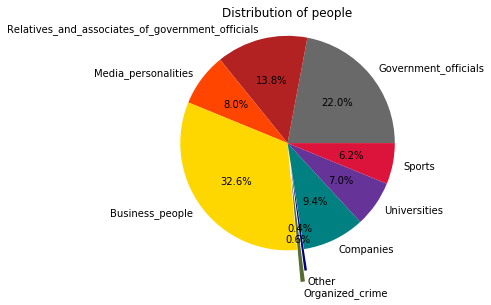

In [0]:
plt.rc('figure', figsize=(5,5))
with open("cumPeopleData.json") as file1:
    data1 = json.load(file1)
sizes = []
count = 0
for key in list(data1.keys()):
    sizes.append(len(data1[key]))
    count += len(data1[key])
labels = list(data1.keys())
myColors = ["dimgrey","firebrick","orangered","gold","darkolivegreen","navy","teal","rebeccapurple","crimson"]
explodeTuple = (0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.0, 0.0, 0.0)
plt.pie(sizes, labels=labels, autopct='%1.1f%%', explode=explodeTuple, colors = myColors)
plt.axis('equal')
plt.title("Distribution of people")
plt.show()

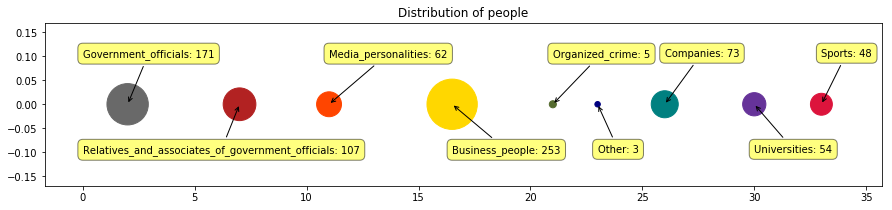

In [0]:
plt.rc('figure', figsize=(15,3))
x = [0,2,7,11,16.5,21,23,26,30,33,34]
y = [0,0,0,0,0,0,0,0,0,0,0]
plotSize = [0]
plotSize = plotSize + sizes
plotSize.append(0)
sizes = [size * 10 for size in plotSize]
myColors = ["white","dimgrey","firebrick","orangered","gold","darkolivegreen","navy","teal","rebeccapurple","crimson", "white"]
plt.scatter(x, y, sizes, c=myColors)
labels = ["",'Government_officials: 171', 'Relatives_and_associates_of_government_officials: 107', 'Media_personalities: 62', 'Business_people: 253', 'Organized_crime: 5', 'Other: 3', 'Companies: 73', 'Universities: 54', 'Sports: 48',""]
xyList = [(0, -2), (0, 0.10),(0,-0.1),(11, 0.1),(16.5, -0.1),(21, 0.1),(23, -0.1),(26, 0.1),(30, -0.1),(33, 0.1),]
for index in range(1,len(labels)-1):

    label = labels[index]

    plt.annotate(label,
        xy=(x[index], y[index]), xytext=xyList[index],
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->'))
plt.title("Distribution of people")
plt.show()

<BarContainer object of 2 artists>

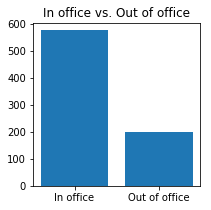

In [0]:
plt.rc('figure', figsize=(3,3))
currentStatus = {"In office": 0,"Out of office":0}
for group in list(data1.keys()):
    peopleList = data1[group]
    for person in peopleList:
        if("former" in person):
            currentStatus["Out of office"] += 1
        else:
            currentStatus["In office"] += 1
plt.title("In office vs. Out of office")
plt.bar(currentStatus.keys(), currentStatus.values())